<a href="https://colab.research.google.com/github/flubber-lab/Potable-Water-Predictor/blob/main/Potable_Water_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/content/water_potability.csv")

In [3]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [41]:
df['Turbidity'].max()

6.739

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


**Trying to find out pH distribution**

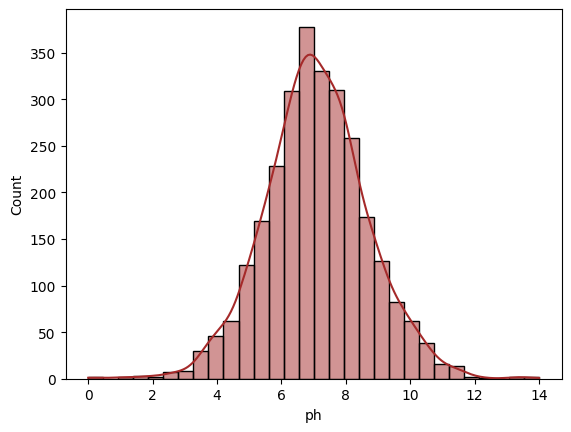

In [8]:
sns.histplot(df['ph'],kde=True,bins=30,color='brown')
plt.show()

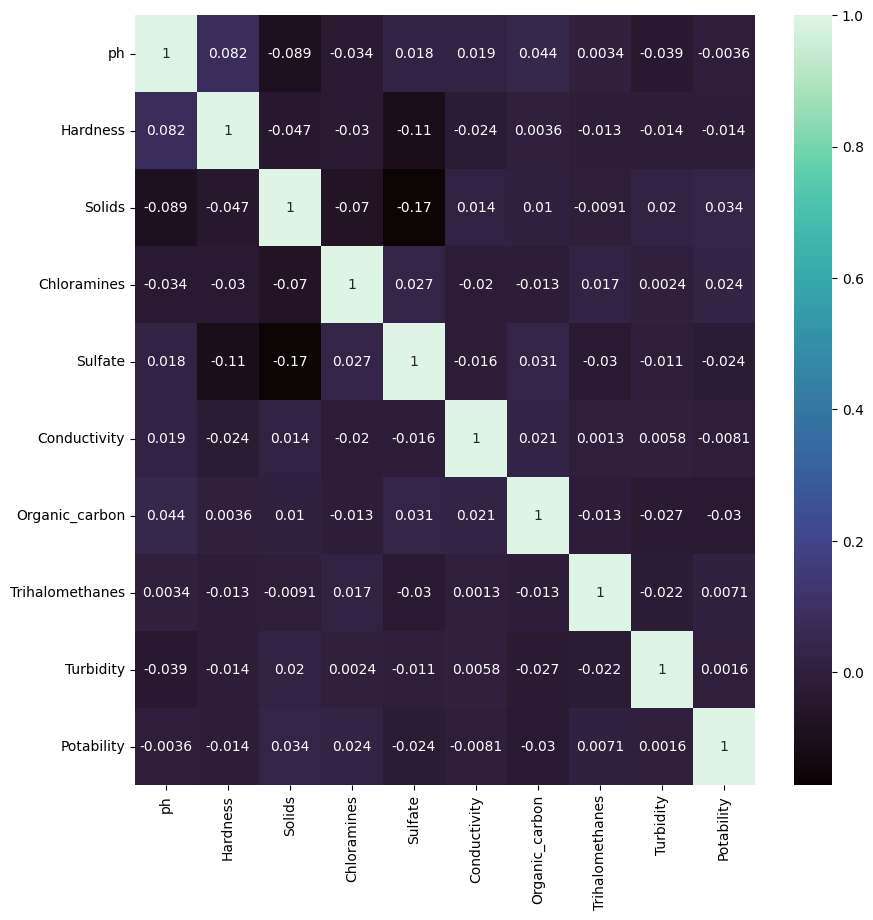

In [12]:
corr_mat = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,annot=True,cmap="mako")
plt.show()

In [13]:
ph_corr = corr_mat['ph'].sort_values(ascending=False)
ph_corr

,ph
ph,1.000000
Hardness,0.082096
Organic_carbon,0.043503
Conductivity,0.018614
Sulfate,0.018203
Trihalomethanes,0.003354
Potability,-0.003556
Chloramines,-0.034350
Turbidity,-0.039057
Solids,-0.089288


In [14]:
df['ph'].fillna(df['ph'].mean(),inplace=True)

<ipython-input-14-01c1af880f0d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ph'].fillna(df['ph'].mean(),inplace=True)


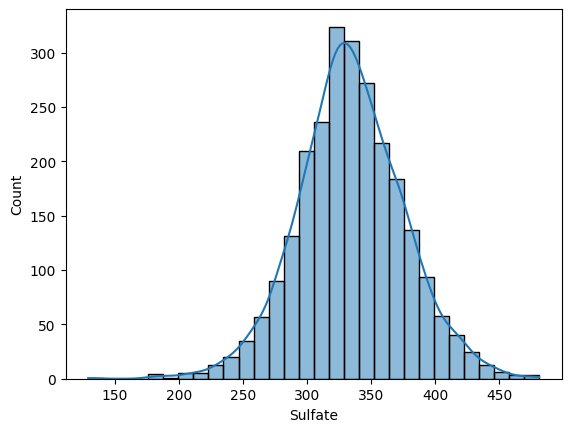

In [21]:
sns.histplot(df['Sulfate'],kde=True,bins=30)
plt.show()

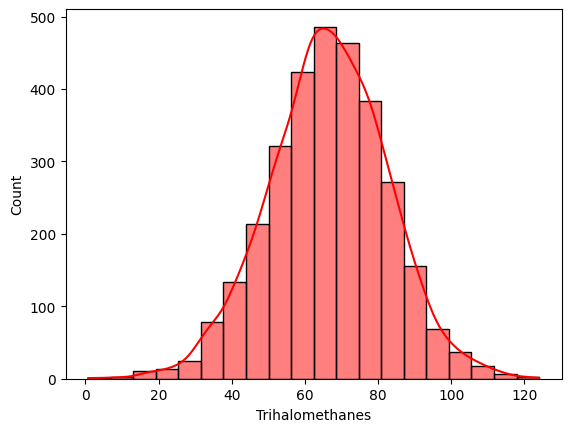

In [22]:
sns.histplot(df['Trihalomethanes'],kde=True,bins=20,color='red')
plt.show()

In [23]:
df['Sulfate'].fillna(df['Sulfate'].median(),inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(),inplace=True)

<ipython-input-23-ea3a15fa1e88>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sulfate'].fillna(df['Sulfate'].median(),inplace=True)
<ipython-input-23-ea3a15fa1e88>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [26]:
df.duplicated().sum()

0

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [27]:
x = df.drop('Potability',axis=1)
y = df['Potability']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2293, 9), (983, 9), (2293,), (983,))

In [31]:
model = LogisticRegression().fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       623
           1       0.80      0.01      0.02       360

    accuracy                           0.64       983
   macro avg       0.72      0.50      0.40       983
weighted avg       0.70      0.64      0.50       983



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(criterion='log_loss').fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       623
           1       0.59      0.39      0.47       360

    accuracy                           0.68       983
   macro avg       0.65      0.62      0.62       983
weighted avg       0.66      0.68      0.66       983



In [33]:
pip install lazypredict

In [35]:
from lazypredict.Supervised import LazyClassifier
model2 = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
models,predictions = model2.fit(x_train,x_test,y_train,y_test)
models

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
100%|██████████| 32/32 [00:07<00:00,  4.19it/s]

[LightGBM] [Info] Number of positive: 918, number of negative: 1375
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2293, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.400349 -> initscore=-0.404012
[LightGBM] [Info] Start training from score -0.404012


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.66,0.62,0.62,0.65,0.42
LGBMClassifier,0.66,0.62,0.62,0.65,0.22
RandomForestClassifier,0.67,0.61,0.61,0.66,1.64
QuadraticDiscriminantAnalysis,0.68,0.61,0.61,0.66,0.04
ExtraTreesClassifier,0.68,0.61,0.61,0.66,0.49
KNeighborsClassifier,0.64,0.60,0.60,0.64,0.11
BaggingClassifier,0.67,0.60,0.60,0.64,0.67
SVC,0.68,0.60,0.60,0.65,0.54
LabelSpreading,0.61,0.58,0.58,0.61,0.41


In [37]:
df['ph'].describe()

,ph
count,3276.00
mean,7.08
std,1.47
min,0.00
25%,6.28
50%,7.08
75%,7.87
max,14.00


In [38]:
import pickle
pickle.dump(model1,open('model.pkl','wb'))